In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [22]:
# Read in both CSVs
df_red = pd.read_csv('data/winequality-red.csv')
df_white = pd.read_csv('data/winequality-white.csv')

In [23]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [24]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [25]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Data Cleaning

In [26]:
# Compile lists containing null / na analyses, along with dType determinations

# Red, Null
null_red = list(df_red.isnull().sum())
null_red.extend(["Count Null","red"])

# White, Null
null_white = list(df_white.isnull().sum())
null_white.extend(["Count Null","white"])

# Red, NA
na_red = list(df_red.isna().sum())
na_red.extend(["Count NA","red"])

# White, NA
na_white = list(df_white.isna().sum())
na_white.extend(["Count NA","white"])

# Red dTypes
red_types = [x.name for x in df_red.dtypes]
red_types.extend(["dType","red"])

# White dTypes
white_types = [x.name for x in df_white.dtypes]
white_types.extend(["dType","white"])

# List of measurements by which the wine was analyzed
chem_analyses = list(df_white.columns.values)
chem_analyses.extend(["Analysis","Wine Type"])

In [27]:
# Create DF with lists
analysis_df = pd.DataFrame([null_red,null_white,na_red,na_white,red_types,white_types],columns=chem_analyses)

In [28]:
# Set index to make multi-indexed DF
analysis_df.set_index(["Wine Type","Analysis"]).sort_index()

fixed acidity volatile acidity citric acid  \
Wine Type Analysis                                                
red       Count NA               0                0           0   
          Count Null             0                0           0   
          dType            float64          float64     float64   
white     Count NA               0                0           0   
          Count Null             0                0           0   
          dType            float64          float64     float64   

                     residual sugar chlorides free sulfur dioxide  \
Wine Type Analysis                                                  
red       Count NA                0         0                   0   
          Count Null              0         0                   0   
          dType             float64   float64             float64   
white     Count NA                0         0                   0   
          Count Null              0         0                   0   
          dType             float64   float64             float64   

                     total sulfur dioxide  density       pH sulphates  \
Wine Type Analysis                                                      
red       Count NA                      0        0        0         0   
          Count Null                    0        0        0         0   
          dType                   float64  float64  float64   float64   
white     Count NA                      0        0        0         0   
          Count Null                    0        0        0         0   
          dType                   float64  float64  float64   float64   

                      alcohol quality  
Wine Type Analysis                     
red       Count NA          0       0  
          Count Null        0       0  
          dType       float64   int64  
white     Count NA          0       0  
          Count Null        0       0  
          dType       float64   int64

# Data Exploration
---
## Quality

In [29]:
# Add column to label wine type
df_red["type"] = 'red'
df_white["type"] = 'white'


### Quality Score Distribution 

In [30]:
# Count number of values per score, per wine type (normalize creates a percent of total value)
red_quality = df_red['quality'].value_counts(normalize=True)
white_quality = df_white['quality'].value_counts(normalize=True)


In [31]:
# Create emplty DF for both wine types, and quality scores from 1 to 10
quality_perc = pd.DataFrame(columns=('Red','White'),index=list(range(1,11)))

# Input quality counts to DF
quality_perc['Red'] = red_quality
quality_perc['White'] = white_quality

# Fill blanks with 0's
quality_perc.fillna(0,inplace=True)

quality_perc

,Red,White
1,0.000000,0.000000
2,0.000000,0.000000
3,0.006254,0.004083
4,0.033146,0.033279
5,0.425891,0.297468
6,0.398999,0.448755
7,0.124453,0.179665
8,0.011257,0.035729
9,0.000000,0.001021
10,0.000000,0.000000


Text(0, 0.5, '% of Total Wines, by Type')

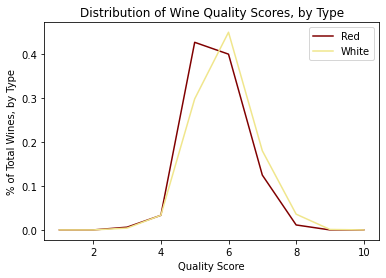

In [32]:
# Visualize 
colors = ['maroon','khaki']
ax = quality_perc.plot(color=colors,title="Distribution of Wine Quality Scores, by Type")
ax.set_xlabel("Quality Score")
ax.set_ylabel("% of Total Wines, by Type")

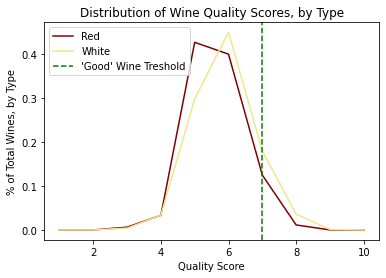

In [33]:
# Determine "Good" wine threshold 
colors = ['maroon','khaki']
ax = quality_perc.plot(color=colors,title="Distribution of Wine Quality Scores, by Type")
ax.set_xlabel("Quality Score")
ax.set_ylabel("% of Total Wines, by Type")

# threshold at 7
plt.axvline(7, color='g',linestyle='--')
plt.legend(["Red", "White","'Good' Wine Treshold"]);


# Add Classification Column

In [34]:
# If wine >= 7, label it "good"

df_red['class'] = ['good' if x >=7 else 'bad' for x in df_red['quality']]
df_white['class'] = ['good' if x >=7 else 'bad' for x in df_white['quality']]

df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,bad


In [35]:
df_red.to_csv('data/red_classified.csv')
df_white.to_csv('data/white_classified.csv')

#### Note

The following combined CSV is to be recreated in SQL, per project guidelines

In [36]:
df_combined = df_red.append(df_white)
df_combined

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,bad
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,bad
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,bad
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,good


In [37]:
df_combined.to_csv('data/combined_and_classified.csv')